In [1]:
%matplotlib inline

In [2]:
# The index on the right is dimension for the figure, the index on the left is the model dimension
model_dim_to_display_dim = {
    1: 1,
    2: 10,
    3: 11,
    4: 17,
    5: 18,
    6: 16,
    7: 12,
    8: 8,
    9: 19,
    10: 3,
    11: 13,
    12: 2,
    13: 14,
    14: 20,
    15: 15,
    16: 7,
    17: 21,
    18: 5,
    19: 6,
    20: 22,
    21: 23,
    22: 9,
    23: 4,
    24: 24,
}
# Invert the dictionary, I made it the wrong way
model_dim_to_display_dim = {v-1: k-1 for k, v in model_dim_to_display_dim.items()}
reorder_columns = list(map(lambda x: x[1], sorted(model_dim_to_display_dim.items())))

roi_to_bonferoni_labels = {
    'OFA': [1, 10, 11, 12, 13, 14, 23],
    'FFA': [8, 10, 11, 13, 14, 19, 22],
    'STS': [4, 6, 8, 18]
}

In [3]:
reorder_color_palette = [0,4,2,6,8,10,12,14,5,15,3,11,7,13,9,1] + [16] * 8

# Vertical Version

STS


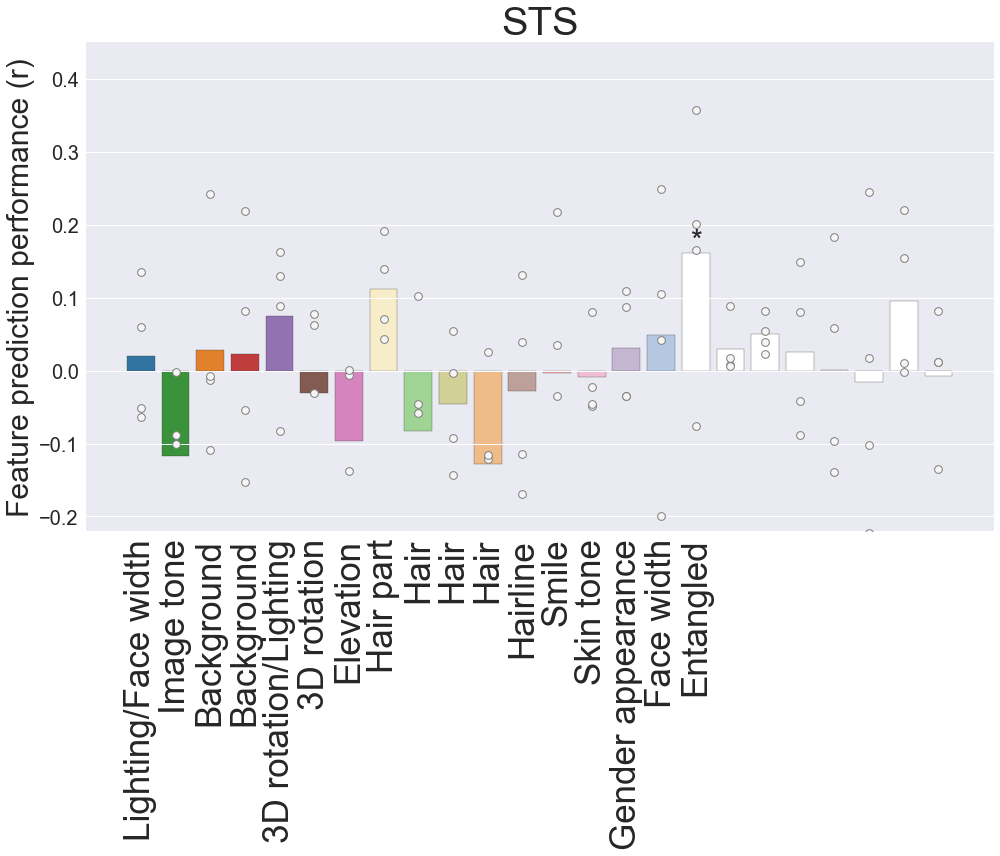

In [9]:
import os
import numpy as np
import glob
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rc

plt.style.use('seaborn')


'''
semantic_dimensions = [
    '1 Lighting/Face width',
    '2 Hair',
    '3 Hair',
    '4 *',
    '5 *',
    '6 Face width',
    
    '7 Hairline',
    '8 Hair part',
    '9 *',
    '\n10 Background',
    '11 Smile',
    '\n\n12 Image tone',
    
    '\n13 Skin tone',
    '14 *',
    '15 Gender appearance',
    '16 Elevation',
    '17 *',
    '18 3D rotation/lighting',
    
    '19 3D rotation',
    '20 *',
    '21 *',
    '22 Hair',
    '23 \nBackground',
    '24 *'
]
'''
semantic_dimensions = [
    'Lighting/Face width',
    'Hair',
    'Hair',
    'Entangled',
    'Entangled',
    'Face width',
    
    'Hairline',
    'Hair part',
    'Entangled',
    'Background',
    'Smile',
    'Image tone',
    
    'Skin tone',
    'Entangled',
    'Gender appearance',
    'Elevation',
    'Entangled',
    '3D rotation/Lighting',
    
    '3D rotation',
    'Entangled',
    'Entangled',
    'Hair',
    'Background',
    'Entangled'
]

roi_to_significant = {
    'OFA': [(0, .16), (1, .16)],
    'FFA': [(2, .18), (3, .105), (12, .195), (13, .195), (19, .225)],
    'STS': [(16, .165)]
}

roi_to_significant_other_roi = {
    'OFA': [(0, .195), (1, .195), (23, .14)],
    'FFA': [(19, .26), (20, .12)],
    'STS': []
}

encoding_corr_feat_dir = '../encoding_corr_feat'
SUBJECTS = np.arange(1,5)
#ROIS = ['OFA', 'FFA']
ROIS = ['STS']
MODELS = ['factor_vae.latent_24.hyper_10.random_50751608.train_bias',
         'vae.latent_24.hyper_1.random_50639474.train_bias',
         'vgg.fc7.24.train_bias']
n_dimenions = 24
#color_palette = sns.color_palette("husl",24)
color_palette_w_grey = sns.color_palette("tab20",18)
grey_index = 15
saturated_yellow = (1, .949, .7569)
color_palette_wo_grey = color_palette_w_grey[:grey_index-1] + color_palette_w_grey[-2:]
color_palette = color_palette_wo_grey + [(1,1,1)] * 8
color_palette[14] = saturated_yellow

color_palette = [color_palette[i] for i in reorder_color_palette]

model = MODELS[0]
if ROIS[0] == 'STS':
    fig = plt.figure(figsize=(14, 12))
else:
    fig = plt.figure(figsize=(16, 20))
plt.rc('ytick', labelsize=20)
fig.subplots_adjust(left=.2,hspace=0, wspace=.2)

for index, roi in  enumerate(ROIS):
    print(roi)
    ax = fig.add_subplot(len(ROIS), 1, index+1)
    if index == 0 and len(ROIS) > 1:
        ax.set_position([.08, 0.5, 0.7, 0.4])
    elif len(ROIS) > 1:
        ax.set_position([0.2, 0.1, 0.7, 0.4])
    else:
        plt.ylabel('Feature prediction performance (r)', fontsize=30)
        
    per_subject_latent_dim_corr = np.empty((4,24))
    for subject_i, subject in enumerate(SUBJECTS):
        encoding_corr_file = os.path.join(encoding_corr_feat_dir, 'subject_{}_roi_{}_model_{}.csv'.format(subject, roi, model))
        #print(encoding_corr_file)
        data = np.genfromtxt(encoding_corr_file, delimiter=',')
        latent_dim_corr = np.mean(data, axis=0)
        per_subject_latent_dim_corr[subject_i] = latent_dim_corr
    average_latent_dim_corr = np.mean(per_subject_latent_dim_corr, axis=0)
    roi_labels = np.array(semantic_dimensions.copy())
    
    # Bonferi correction labeing
    #for i in range(len(roi_labels)):
    #    if i not in roi_to_bonferoni_labels[roi]:
    #        roi_labels[i-1] = ''
            
    # Significance labeling
    #roi_labels[average_latent_dim_corr < .05] = ''
    
    #plt.bar(np.arange(1,25), average_latent_dim_corr)
    #plt.show()
    #graph = sns.barplot(x=np.arange(1,25), y=average_latent_dim_corr, ci=68)
    data_frame = pd.DataFrame(per_subject_latent_dim_corr)
    data_frame = data_frame.reindex(columns=reorder_columns)
    
    plt.ylim(-.22, .45)
    
    graph = sns.barplot(data=data_frame, ci=68, errwidth=0, palette=color_palette, ax=ax, zorder=0, edgecolor=".2", alpha=1)
    
    #if index > 0:
    #    graph.set_yticklabels([])
    #ax.set_xticks([2.999, 3.999, 6.999, 8.999, 9.999, 11.999, 12.999, 15.999, 17.999, 19.999, 21.999], minor=True)
    #ax.xaxis.grid(True, which='minor')
    
    plt.title(roi, fontsize=40)
    x_labels = pd.DataFrame(roi_labels).T
      
    '''
    for i, mean in enumerate(data_frame.mean()):
        if roi == 'OFA':
            if i in [0, 1, 2, 12, 13]:
                height = mean
                plt.text(i, height, '*', ha='center', va='bottom', fontsize=30)
        if roi == 'FFA':
            if i in [2, 5, 7, 8, 12, 13, 19]:
                height = mean
                plt.text(i, height, '*', ha='center', va='bottom', fontsize=30)
        if roi == 'STS':
            if i in [4, 7, 16]:
                height = mean
                plt.text(i, height, '*', ha='center', va='bottom', fontsize=30)
    '''
    
    x_labels = x_labels.reindex(columns=reorder_columns)
    only_label_one_entangled_dim = True
    if only_label_one_entangled_dim == True:
        duplicate_entangled_label_dims = [4, 8, 13, 16, 19, 20, 23]
        for dim in duplicate_entangled_label_dims:
            x_labels[dim] = ''
    if index == 1 or len(ROIS) == 1:
        graph.set_xticklabels(x_labels.loc[0,:], rotation=90, fontsize=35)
    else:
        graph.set_xticklabels("", rotation=90, fontsize=35)
    #plt.scatter(np.arange(24),per_subject_latent_dim_corr[0], c='#8c8c8c')
    plt.scatter(np.arange(24),pd.DataFrame(per_subject_latent_dim_corr[0]).T.reindex(columns=reorder_columns), linewidths=1,edgecolors='gray',c='whitesmoke', s=60)
    plt.scatter(np.arange(24),pd.DataFrame(per_subject_latent_dim_corr[1]).T.reindex(columns=reorder_columns), linewidths=1,edgecolors='gray',c='whitesmoke', s=60)
    plt.scatter(np.arange(24),pd.DataFrame(per_subject_latent_dim_corr[2]).T.reindex(columns=reorder_columns), linewidths=1,edgecolors='gray',c='whitesmoke', s=60)
    plt.scatter(np.arange(24),pd.DataFrame(per_subject_latent_dim_corr[3]).T.reindex(columns=reorder_columns), linewidths=1, edgecolors='gray', c='whitesmoke', s=60)
    for significant_dim in roi_to_significant[roi]:
        plt.text(x=significant_dim[0]-.17, y=significant_dim[1], s='*', fontsize=30)
        
    for significant_dim in roi_to_significant_other_roi[roi]:
        plt.text(x=significant_dim[0]-.17, y=significant_dim[1], s='>', fontsize=20)

if len(ROIS) > 1:
    fig.text(.1, .4, 'Feature prediction performance (r)', ha='center', rotation=90, fontsize=30)
plt.tight_layout()
if len(ROIS) > 1:
    plt.savefig('Fig 5.eps', format='eps')
else:
    plt.savefig('Fig S3.eps', format='eps')

plt.show()


In [ ]:
data_frame

In [ ]:
duplicate_entangled_label_dims = [4, 8, 13, 16, 19, 20, 23]
for dim in duplicate_entangled_label_dims:
    x_labels[dim] = ''

# CCN Poster

In [ ]:
import os
import numpy as np
import glob
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rc

plt.style.use('seaborn')


'''
semantic_dimensions = [
    '1 Width/lighting',
    '2 Hair',
    '3 Hair',
    '4 *',
    '5 *',
    '6 Width',
    
    '7 Hairline',
    '8 Hair part',
    '9 *',
    '\n10 Background',
    '11 Smile',
    '\n\n12 Image tone',
    
    '\n13 Skintone',
    '14 *',
    '15 Gender appearance',
    '16 Head elevation/hair',
    '17 *',
    '18 3D rotation/lighting',
    
    '19 3D rotation',
    '20 *',
    '21 *',
    '22 Hair',
    '23 \nBackground',
    '24 *'
]
'''
semantic_dimensions = [
    'Width/lighting',
    'Hair',
    'Hair',
    'Entangled',
    'Entangled',
    'Width',
    
    'Hairline',
    'Hair part',
    'Entangled',
    'Background',
    'Smile',
    'Image tone',
    
    'Skintone',
    'Entangled',
    'Gender appearance',
    'Head elevation/hair',
    'Entangled',
    '3D rotation/lighting',
    
    '3D rotation',
    'Entangled',
    'Entangled',
    'Hair',
    'Background',
    'Entangled'
]

encoding_corr_feat_dir = '../encoding_corr_feat'
SUBJECTS = np.arange(1,5)
ROIS = ['OFA', 'FFA']
#ROIS = ['OFA']
MODELS = ['factor_vae.latent_24.hyper_10.random_50751608.train_bias',
         'vae.latent_24.hyper_1.random_50639474.train_bias',
         'vgg.fc7.24.train_bias']
n_dimenions = 24
#color_palette = sns.color_palette("husl",24)
color_palette_w_grey = sns.color_palette("tab20",18)
grey_index = 15
saturated_yellow = [(1, .949, .7569)]
#TODO: remove the dark puke color, we don't use it anymore. We also need to insert saturated_yellow and then reorder the colors
color_palette_wo_grey = color_palette_w_grey[:grey_index-1] + color_palette_w_grey[-2:]
color_palette = color_palette_wo_grey + [(1,1,1)] * 8

model = MODELS[0]
fig = plt.figure(figsize=(12, 10))
plt.rc('ytick', labelsize=20)
fig.subplots_adjust(hspace=0, wspace=.2)
for index, roi in  enumerate(ROIS):
    ax = fig.add_subplot(len(ROIS), 1, index+1)
    #if index == 0:
    #    plt.ylabel('Feature prediction performance (r)', fontsize=30)
        
    per_subject_latent_dim_corr = np.empty((4,24))
    for subject_i, subject in enumerate(SUBJECTS):
        encoding_corr_file = os.path.join(encoding_corr_feat_dir, 'subject_{}_roi_{}_model_{}.csv'.format(subject, roi, model))
        #print(encoding_corr_file)
        data = np.genfromtxt(encoding_corr_file, delimiter=',')
        latent_dim_corr = np.mean(data, axis=0)
        per_subject_latent_dim_corr[subject_i] = latent_dim_corr
    average_latent_dim_corr = np.mean(per_subject_latent_dim_corr, axis=0)
    roi_labels = np.array(semantic_dimensions.copy())
    
    # Bonferi correction labeing
    for i in range(len(roi_labels)):
        if i not in roi_to_bonferoni_labels[roi]:
            roi_labels[i-1] = ''
            
    # Significance labeling
    roi_labels[average_latent_dim_corr < .05] = ''
    
    #plt.bar(np.arange(1,25), average_latent_dim_corr)
    #plt.show()
    #graph = sns.barplot(x=np.arange(1,25), y=average_latent_dim_corr, ci=68)
    data_frame = pd.DataFrame(per_subject_latent_dim_corr)
    data_frame = data_frame.reindex(columns=reorder_columns)
    
    plt.ylim(-.2, .45)
    
    graph = sns.barplot(data=data_frame, ci=68, errwidth=0, palette=color_palette, ax=ax, zorder=0, edgecolor=".2", alpha=1)

    #if index > 0:
    #    graph.set_yticklabels([])
    #ax.set_xticks([2.999, 3.999, 6.999, 8.999, 9.999, 11.999, 12.999, 15.999, 17.999, 19.999, 21.999], minor=True)
    #ax.xaxis.grid(True, which='minor')
    
    plt.title(roi, fontsize=40)
    x_labels = pd.DataFrame(roi_labels).T
    x_labels = x_labels.reindex(columns=reorder_columns)
    graph.set_xticklabels("", rotation=90, fontsize=25)
    #plt.scatter(np.arange(24),per_subject_latent_dim_corr[0], c='#8c8c8c')
    plt.scatter(np.arange(24),pd.DataFrame(per_subject_latent_dim_corr[0]).T.reindex(columns=reorder_columns), c='#8c8c8c', s=60)
    plt.scatter(np.arange(24),pd.DataFrame(per_subject_latent_dim_corr[1]).T.reindex(columns=reorder_columns), c='#8c8c8c', s=60)
    plt.scatter(np.arange(24),pd.DataFrame(per_subject_latent_dim_corr[2]).T.reindex(columns=reorder_columns), c='#8c8c8c', s=60)
    plt.scatter(np.arange(24),pd.DataFrame(per_subject_latent_dim_corr[3]).T.reindex(columns=reorder_columns), c='#8c8c8c', s=60)


fig.text(-.02, .16, 'Feature prediction performance (r)', ha='center', rotation=90, fontsize=30)
plt.tight_layout()
#plt.savefig('feature performance.png')
plt.show()


# Generate the legend

In [25]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

__all__ = ["palplot", "dogplot"]


def palplot(pal, size=1, x_labels=[]):
    """Plot the values in a color palette as a horizontal array.
    Parameters
    ----------
    pal : sequence of matplotlib colors
        colors, i.e. as returned by seaborn.color_palette()
    size :
        scaling factor for size of plot
    """
    n = len(pal)
    sns.set(font_scale = .75 * size)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto", zorder=1)
    ax.set_xticks(np.arange(n))
    ax.set_yticks([-.5, .5])
    # Ensure nice border between colors
    ax.set_xticklabels(x_labels, rotation=45, fontdict={
                                                 'horizontalalignment': 'right'}, fontsize=30)
    # The proper way to set no ticks
    ax.yaxis.set_major_locator(ticker.NullLocator())
    # Circle the white color with a border
    plt.plot([15.49,15.49], [-.5,.5], color='0', linewidth=1)
    plt.plot([16.5,16.5], [-.5,.5], color='0', linewidth=2)
    plt.plot([15.5,16.5], [-.49,-.49], color='0', linewidth=2)
    plt.plot([15.5,16.5], [.5,.5], color='0', linewidth=2)

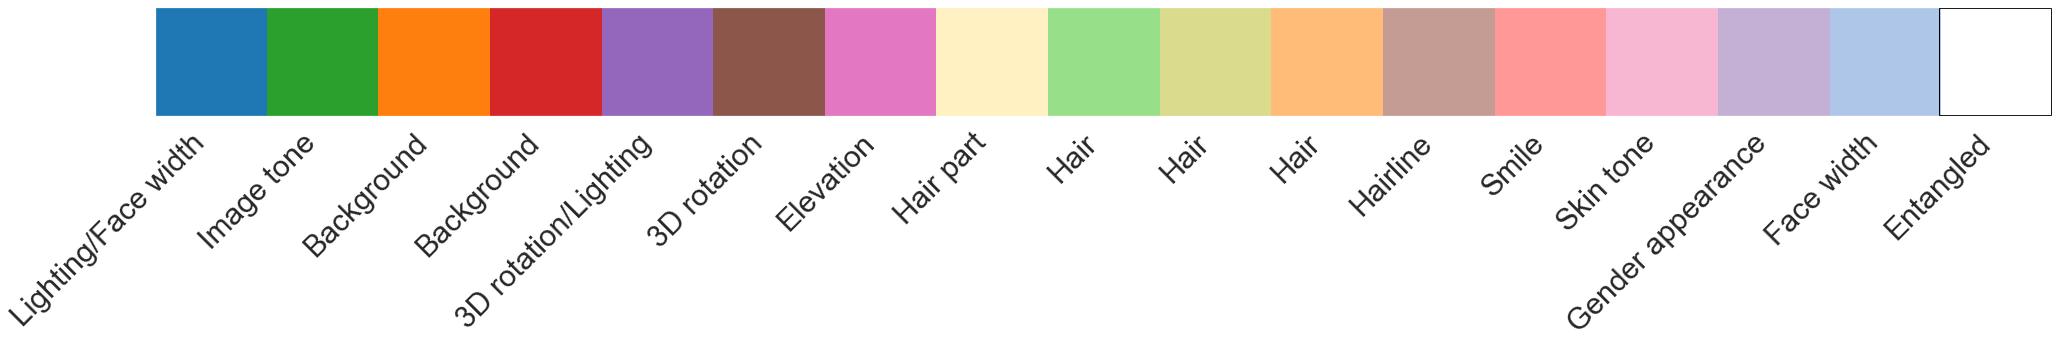

In [26]:
x_labels = pd.DataFrame(semantic_dimensions).T
x_labels = x_labels.reindex(columns=reorder_columns)
graph = palplot(sns.color_palette(color_palette[0:17]), size=2, x_labels=x_labels.values[0][0:17])

In [21]:
len(color_palette)

16

# Scratch

In [ ]:
#np.pad(img, ((100, 100), (200, 200), (0,0)), constant_values=0)
#mpl.colors.ListedColormap(list(sns.color_palette(color_palette[0:17])))
plt.plot([16,16], [0,1])

In [ ]:
import colorsys

In [ ]:
b

In [ ]:
a[0]

In [ ]:
h, l, s = colorsys.rgb_to_hls(a[0][0],a[0][1],a[0][2])

# manipulate h, l, s values and return as rgb
colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

In [ ]:
a[1] = colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

In [ ]:
print(a[2])

In [ ]:
color_palette[2]

In [ ]:
sns.color_palette(final_palette)

In [ ]:
color

In [ ]:
freesurfer_colors = '''
#ff0400
#ff2f00
#ff5d00
#ff8800
#ffb200
#ffe200
#f0ff00
#c6ff00
#97ff00
#6dff00
#42ff00
#13ff00
#00ff16
#00ff41
#00ff70
#00ff9a
#00ffc4
#00fff4
#00dfff
#00b5ff
#0085ff
#005bff
#0030ff
#0004ed
'''
pref_map_color = sns.color_palette(freesurfer_colors.split())
pref_map_color

In [ ]:
x = np.arange(24)
y = np.ones(24)
sns.barplot(x=x,y=y, palette=pref_map_color)

In [ ]:
def palplot(pal, size=1, labels=None):
    """Plot the values in a color palette as a horizontal array.
    Parameters
    ----------
    pal : sequence of matplotlib colors
        colors, i.e. as returned by seaborn.color_palette()
    size :
        scaling factor for size of plot
    """
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n) + 3,
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    # Ensure nice border between colors
    ax.set_xticklabels(labels, fontdict={'horizontalalignment': 'left'})
    # The proper way to set no ticks
    ax.yaxis.set_major_locator(ticker.NullLocator())


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
palplot(pref_map_color, size=1, labels=semantic_dimensions)
plt.tight_layout()
plt.savefig('preference_map_colorbar.png')

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
palplot(pref_map_color, size=1, labels=semantic_dimensions)

In [ ]:
import matplotlib as mpl
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print(font_names)

In [ ]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [ ]:
dir(fig)